<table align="center" width="100%">
    <tr>
        <td width="35%">
            <img src="https://dm3omg1n1n7zx.cloudfront.net/rcni/static/journals/nr/aop/nr.2023.e1885/tile/nr.2023.e1885_abs.jpg">
        </td>
        <td>
            <div align="center">
                <font color="#7F0542" size="6">
                    <b>ANOVA</b>
                </font>
            </div>
        </td>
    </tr>
</table>

## <font color='red'>**Please note that any topics that are not covered in today's lecture will be covered in the next lecture.**</font>

## <font color='blue'>**Content**</font>

1. Lecture Agenda
2. One Way ANOVA
3. Assumptions of ANOVA
4. Kruskal Wallis test
5. QQ - plot
6. Shapiro Wilk test
7. Levene's Test

## <font color='blue'> One Way - ANOVA </font>

<font color='purple'>What is the main gist of Hypothesis Testing?</font>

Suppose we have data from IQ tests taken by students in two different schools. We want to know the differences we see in their scores. Is the difference **Chance** or **Significant**?

So, here's the deal:

- If the difference we see in the IQ scores across groups is small, then it could be due to a **chance factor** (Ex: between Harvard and Stanford).
 - In this context, our pvalue is the probability of observing data as extreme as this, under the assumption that there is no difference in the mean IQ scores of the two schools
 - Hence, the pvalue is expected to be **high**, which means the difference isn't that important.

- Alternately, if the differences are large,
 - It is increasingly unlikely that the difference is due to a random chance.
 - Hence we consider it to be "significant."
 - This is when we get a "low p-value," indicating that there's something substantial going on.

#### <font color='purple'>**Motivation:**</font>

<font color='purple'>As a data scientist, you may be asked to figure out: "Which product generates the highest income for us?"</font>

- While we have used tests like T-test and Z-test to compare two products at a time, this approach isn't efficient when you have many products.
- To handle multiple groups (products) effectively, we need a more powerful tool: **One-way ANOVA**.
    - This powerful statistical test allows you to analyze the income generated by all products simultaneously.

#### <font color='purple'>Aerofit Example </font>



In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
!wget --no-check-certificate https://drive.google.com/uc?id=1n9268qSj_5Q7KS_ntpv-wFPQC1UyJh6f -O aerofit.csv

--2024-01-18 09:39:53--  https://drive.google.com/uc?id=1n9268qSj_5Q7KS_ntpv-wFPQC1UyJh6f
Resolving drive.google.com (drive.google.com)... 64.233.181.102, 64.233.181.100, 64.233.181.101, ...
Connecting to drive.google.com (drive.google.com)|64.233.181.102|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1n9268qSj_5Q7KS_ntpv-wFPQC1UyJh6f [following]
--2024-01-18 09:39:53--  https://drive.usercontent.google.com/download?id=1n9268qSj_5Q7KS_ntpv-wFPQC1UyJh6f
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 142.250.148.132, 2607:f8b0:4001:c54::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|142.250.148.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7461 (7.3K) [application/octet-stream]
Saving to: ‘aerofit.csv’

aerofit.csv         100%[===================>]   7.29K  --.-KB/s    in 0s      

2024-01-18 09:39:53 (56.0 MB/s) - ‘

In [ ]:
df_aerofit = pd.read_csv('/content/aerofit.csv')

In [ ]:
df_aerofit.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


In the chi-square test lecture,

- We found that there's a connection/relationship, between features like: `product type` and `gender`.
  - We observed that women tend to purchase **KP781** products less frequently than men.

- When we did the same test between `income` and `gender`.
  - It became evident that, on an average, men had higher income and a wider range of income levels compared to women.
  - We did a test and observed that this difference was significant, and not a chance factor.


Let's explore more relationships within this data:

- Is there a relationship between the type of product someone chooses and their income level?
- And if there is a connection, how does it impact the situation?

In [ ]:
df_aerofit["Product"].unique()

array(['KP281', 'KP481', 'KP781'], dtype=object)

<font color='purple'>**Setup 1:**</font>

<Axes: xlabel='Product', ylabel='Income'>

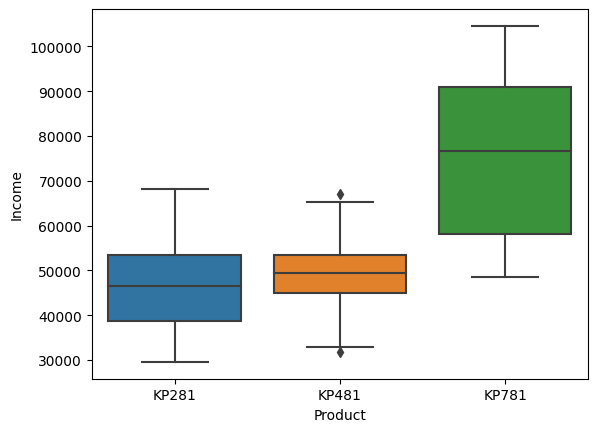

In [ ]:
sns.boxplot(x='Product', y='Income', data=df_aerofit)

Interpreting the plot, we observe that
- Individuals who purchased the product KP781 tend to have higher incomes compared to those who bought the other products.
- This plot suggests that there might be a connection between the type of product and income levels.

<br>



<font color='purple'>We've studied multiple tests</font>

- When we compare `Income` and `Gender`, we use a **T-test**.
 - As it works when we're comparing a numerical value (like income) with two categorical options (like male and female).
 - It will help us decide if there's a meaningful difference between the means the two groups.

- When we compare `Product` and `Gender`, we use a **chi-square test**.
 - As it is perfect when we're dealing with **2 categorical features**.


Considering the various hypothesis tests,

> **Which test can we use to verify whether the relation between `Product` and `Income` is significant or a chance factor?**

- `Income` is a numerical feature.
- `Product` is a categorical feature with three possible values
  
Recall that T-test only worked if the categorical feature had 2 possible values.

Though we can implement T-test, it would not be easy.
- **We would have to perform multiple independent T-tests.**
 - For `n` categories, we would have to do T-test for $ ^nC_2$ number of pairs.
- Moreover, as we perform so many tests, there is a **higher chance of errors creeping in / compounding.**
 - We define $α$ as the level of error we are okay with, for performing a certain test.
 - This means that for $α=0.05$, we are okay with having 5% errors.
 - So there is 5% probability that you may call the difference to be statistically different, even when it is due to a chance factor.
 - When we are performing multiple tests, you may not get the correct conclusion in all tests. Hence, the errors from them would compund.



To overcome these issues, we use: **the One-way ANOVA test**.
- `One:` Refers to the single independent variable used in the analysis.(i.e., Product)
- `Way:` Indicates the direction of the analysis, which is comparing the mean of the dependent variable (i.e., Income) across different groups defined by the independent variable (i.e., Product).
- `ANOVA:` Analysis of Variance.

This test steps in when we're dealing with a categorical feature that can consist of two or more categories

It helps us figure out if there's a significant difference between them.

<font color='purple'>**Setup 2:**</font>

Let's understand how ANOVA works step by step.

- First, let's introduce a new column called "`random_group`."

- This column is going to have three different groups (g1, g2, and g3), which will be assigned randomly to each row.

In [ ]:
np.random.seed(42)
df_aerofit["random_group"] = np.random.choice(["g1", "g2", "g3"], size=len(df_aerofit))

In [ ]:
df_aerofit.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,random_group
0,KP281,18,Male,14,Single,3,4,29562,112,g3
1,KP281,19,Male,15,Single,2,3,31836,75,g1
2,KP281,19,Female,14,Partnered,4,3,30699,66,g3
3,KP281,19,Male,12,Single,3,3,32973,85,g3
4,KP281,20,Male,13,Partnered,4,2,35247,47,g1


Creating a boxplot to visualise the distribution of income among the three random groups (g1, g2 and g3).

<Axes: xlabel='random_group', ylabel='Income'>

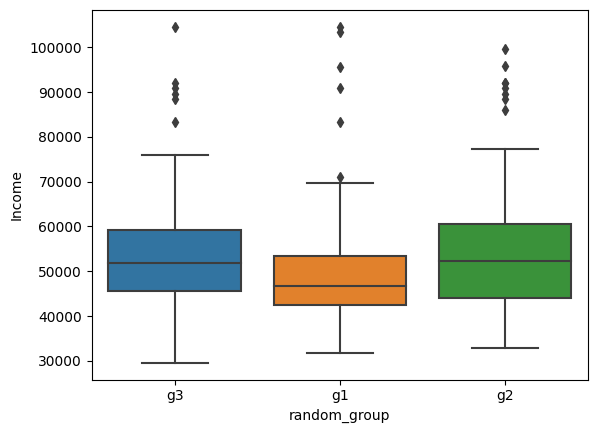

In [ ]:
sns.boxplot(x='random_group', y='Income', data=df_aerofit)

The difference between the income of g1, g2 and g3 seem to be due to a chance factor only, as they seem to have comparable mean incomes.

<font color='purple'>Let's compare the  boxplot of `Income vs random_group` and `Income vs Product`</font>

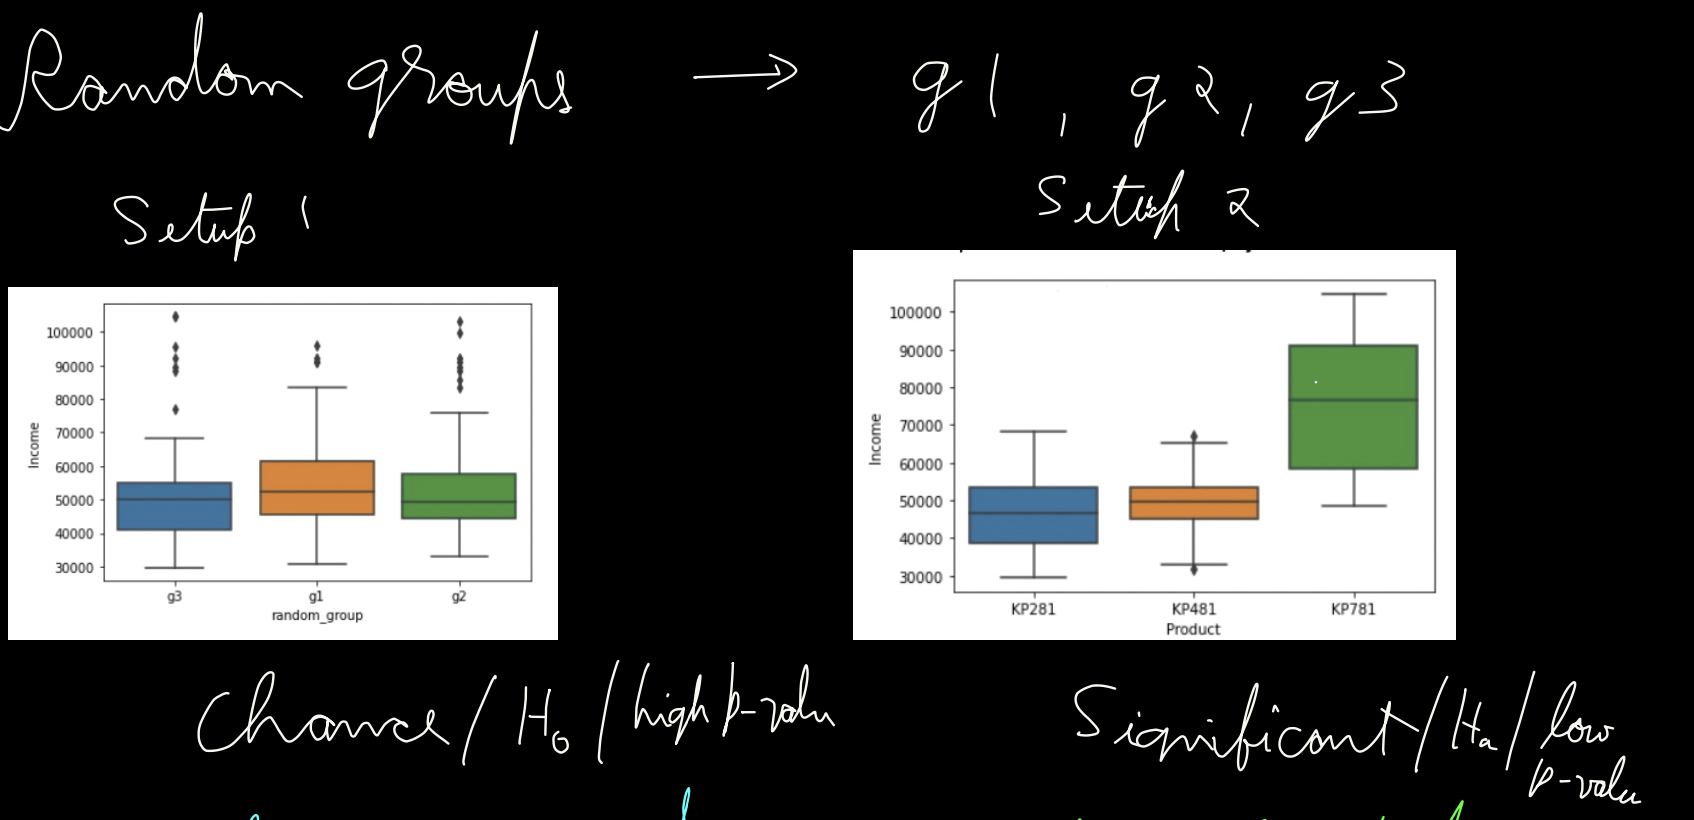

There is a fundamental distinction:

- In the case of the `Product` boxplot, we find that the mean income of customers of different product seems to be significantly different.

- Whereas, in the `random_group` boxplot, it doesn't seem like there is a substantial difference in income among the random groups.
 - Instead, they appear more in line with what we'd expect by chance alone.



Let's break this down into a more concise way to understand the differences between two setups.

In both setups, we have our null and alternate hypothesis, as:

- **Null hypothesis($H_0$):** States that the means of all groups are equal.
- **Alternate hypothesis($H_1$):**  States that at least one of the means is different.



Let's analyse the variance (spread of data) in this setup:

- Think of Variance "between the groups" as the differences we observe among different groups, and "within the groups" as the variations within each individual group.


- **Variance "between the groups"**

 - It seems relatively uniform across almost every group in the **first setup**
 - In the **second setup**, there seems to be greater differences.


- **Variance "within the groups"**
 - In setup one, "within the groups" variance is higher because the data within each group is quite similar.
 - In setup two, the variance is more pronounced, indicating significant differences among the groups.

In order to capture this relation, we introduce a new statistic known as the **F-ratio**.

<font color='purple'>**F = Variability Between Groups / Variability Within Groups**</font>

<br>


**Note:** Based on our observations, we can anticipate F-ratio to be higher for setup two.




**Scenario 1:**

#### Let's apply ANOVA to see if there is a relation between `Income` and `random_group` features

In [ ]:
from scipy.stats import f_oneway # Numeric Vs categorical for many categories
from scipy.stats import ttest_ind # Numeric Vs categorical

from statsmodels.graphics.gofplots import qqplot

<Axes: xlabel='random_group', ylabel='Income'>

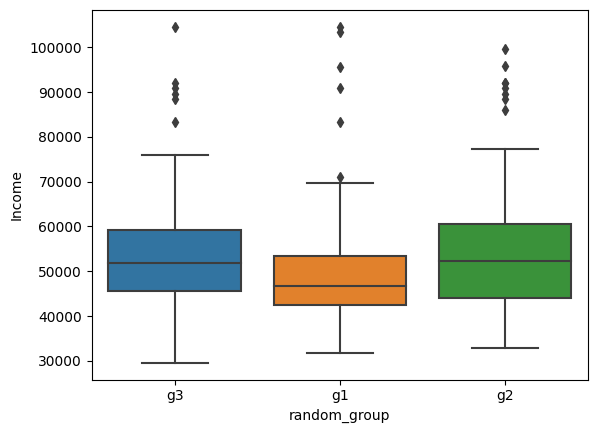

In [ ]:
sns.boxplot(x='random_group', y='Income', data=df_aerofit)

##### <font color='green'>**STEP 1:**</font>

> **What should be the null and alternate hypothesis?**

- **Null hypothesis ($H_0$):** States that the means of all groups are equal.
- **Alternate hypothesis ($H_1$):**  States that at least one of the means is different.

##### <font color='green'>**STEP 2:**</font>

> **What is the distribution?**

- Guassian distribution.

##### <font color='green'>**STEP 3:**</font>

We perform ANOVA and calculate the P-Value

In [ ]:
income_g1 = df_aerofit[df_aerofit["random_group"]=="g1"]["Income"]
income_g2 = df_aerofit[df_aerofit["random_group"]=="g2"]["Income"]
income_g3 = df_aerofit[df_aerofit["random_group"]=="g3"]["Income"]

In [ ]:
income_g1.mean()

51840.44827586207

In [ ]:
income_g2.mean()

55812.69642857143

In [ ]:
income_g3.mean()

53594.954545454544

In [ ]:
# H0: All groups have the same mean
# Ha: One or more groups have different mean
f_stats, p_value = f_oneway(income_g1, income_g2, income_g3)

print("test statistic:",f_stats)
print("p_value:",p_value)

test statistic: 0.8263259710788367
p_value: 0.43933541801191467


##### <font color='green'>**STEP 4:**</font>

We defined $α = 0.05$ for confidence level 95%

In [ ]:
if p_value < 0.05:
    print("Reject H0")
    print("Atleast one group have different mean")
else:
    print("Fail to reject H0")
    print("All groups have same mean")

Fail to reject H0
All groups have same mean


**Scenario 2:**

#### Let's apply One-way ANOVA to see if there is a relation between `Income` and `Product` features

<Axes: xlabel='Product', ylabel='Income'>

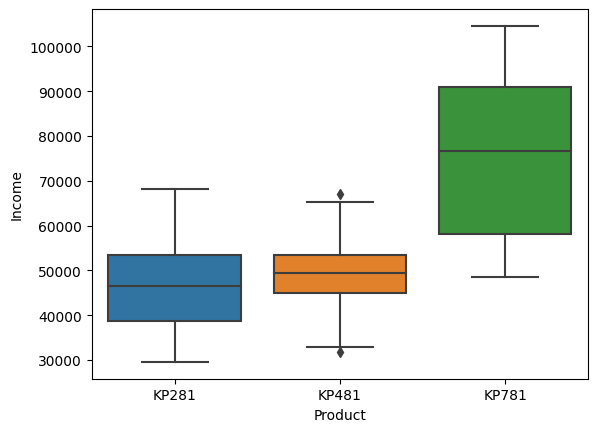

In [ ]:
sns.boxplot(x='Product', y='Income', data=df_aerofit)

##### <font color='green'>**STEP 1:**</font>

> **What should be the null and alternate hypothesis?**

- **Null hypothesis($H_0$):** States that the means of all products are equal.
- **Alternate hypothesis($H_1$):** States that at least one of the means is different.

##### <font color='green'>**STEP 2:**</font>

> **What is the distribution?**

- Guassian distribution.

##### <font color='green'>**STEP 3:**</font>

We perform ANOVA and calculate the P-Value

In [ ]:
income_kp281 = df_aerofit[df_aerofit["Product"]=="KP281"]["Income"]
income_kp481 = df_aerofit[df_aerofit["Product"]=="KP481"]["Income"]
income_kp781 = df_aerofit[df_aerofit["Product"]=="KP781"]["Income"]

In [ ]:
income_kp281.mean()

46418.025

In [ ]:
income_kp481.mean()

48973.65

In [ ]:
income_kp781.mean()

75441.575

In [ ]:
f_stats, p_value = f_oneway(income_kp281, income_kp481, income_kp781)

print("test statistic:",f_stats)
print("p_value:",p_value)

test statistic: 89.25903546601671
p_value: 1.5644991316342494e-27


##### <font color='green'>**STEP 4:**</font>

We defined $α = 0.05$ for confidence level 95%

In [ ]:
if p_value < 0.05:
    print("Reject H0")
    print("Atleast one group have different mean")
else:
    print("Fail to reject H0")
    print("All groups have same mean")

Reject H0
Atleast one group have different mean


## Approaching the Problem with 2-Sample T-Test

##### <font color='purple'> Let's test the relation between `Income` and `Product` to find out which group have a different mean.</font>

We can use T-test to check for a relation between these features.

However, since T-test only caters to categorical features with 2 variables, we would need to perform independent T-tests multiple times, by pairing the income data as:
- Income of customers who bought KP281 vs. KP481
- Income of customers who bought KP781 vs. KP481
- Income of customers who bought KP281 vs. KP781

This approach is also known as **Pairwise T-test**, as we looking testing if there is a significant difference among each possible pair, one by one.

In [ ]:
# Try pairwise T-tests for fun
# H0: Two means are same
t_stat, p_value = ttest_ind(income_kp281, income_kp481)
print("p_value:",p_value)
if p_value < 0.05:
    print("Reject H0")
    print('This means that we have enough evidence to conclude that the means of the two income product groups are statistically different from each other.')
else:
    print("Fail to reject H0")
    print('This means that we do not have enough evidence to conclude that the means of the two income product groups are statistically different from each other.')

p_value: 0.09487529747264932
Fail to reject H0
This means that we do not have enough evidence to conclude that the means of the two income product groups are statistically different from each other.


In [ ]:
# Try pairwise T-tests for fun
# H0: Two means are same
t_stat, p_value = ttest_ind(income_kp481, income_kp781)
print("p_value:",p_value)
if p_value < 0.05:
    print("Reject H0")
    print('This means that we have enough evidence to conclude that the means of the two income product groups are statistically different from each other.')
else:
    print("Fail to reject H0")
    print('This means that we do not have enough evidence to conclude that the means of the two income product groups are statistically different from each other.')

p_value: 7.770191623361236e-16
Reject H0
This means that we have enough evidence to conclude that the means of the two income product groups are statistically different from each other.


In [ ]:
# Try pairwise T-tests for fun
# H0: Two means are same
t_stat, p_value = ttest_ind(income_kp281, income_kp781)
print("p_value:",p_value)
if p_value < 0.05:
    print("Reject H0")
    print('This means that we have enough evidence to conclude that the means of the two income product groups are statistically different from each other.')
else:
    print("Fail to reject H0")
    print('This means that we do not have enough evidence to conclude that the means of the two income product groups are statistically different from each other.')

p_value: 4.116508528877672e-21
Reject H0
This means that we have enough evidence to conclude that the means of the two income product groups are statistically different from each other.


Income groups KP781 vs. KP481 &  KP281 vs. KP781 have different means.

---

## <font color='blue'> Assumptions of One-way ANOVA</font>

To implement the One-way ANOVA test, we need to make sure that they are satisfying certain conditions:

1. Data should be normally distributed (i.e, Gaussian)

2. Data should be independent across each record

3. Equal variance in different groups

In real world, we might not always find Gaussian data.

> **How will we conduct our hypothesis test, in case our data is not Gaussian?**

##  <font color='purple'>Kruskal-Wallis test</font>

The Kruskal-Wallis test is a statistical test used to compare the medians of two or more independent groups.

It is an alternative to the one-way ANOVA, making it useful when data is not normally distributed.

**Null Hypothesis (H0):**

* The populations of all groups have the same median.
  * In other words, there is no statistically significant difference in the medians of the groups being compared.

**Alternative Hypothesis (H1):**

* At least one of the populations has a different median.
  * There is a statistically significant difference in the medians of at least two groups.

<br>

**Advantages of Kruskal-Wallis Test:**

* No assumption of normality: It doesn't require the data to be normally distributed.
* Robust to outliers: Outliers don't significantly affect the results.

**Limitations of Kruskal-Wallis Test:**

* Doesn't provide information about which groups differ: It only tells you if there is a difference, not which groups specifically differ.
* Less powerful than ANOVA when assumptions are met: If the data is normally distributed and has no outliers, ANOVA is more powerful.


In [ ]:
from scipy.stats import kruskal

[Documentation](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.kruskal.html)

##### Let's apply Kruskal to see if there is a relation between `Income` and `random_group` features

In [ ]:
stat, p_value = kruskal(income_g1, income_g2, income_g3)

print("test statistic:",stat)
print("p_value:",p_value)

test statistic: 2.720864198623469
p_value: 0.2565498979655774


In [ ]:
if p_value < 0.05:
    print("Reject H0")
    print("Atleast one group have different median")
else:
    print("Fail to reject H0")
    print("All groups have same median")

Fail to reject H0
All groups have same median


##### Let's apply ANOVA to see if there is a relation between `Income` and `Product` features

In [ ]:
# If assumptions of ANOVA fail, use kruskal
stat, p_value = kruskal(income_kp281, income_kp481, income_kp781)

print("test statistic:",stat)
print("p_value:",p_value)

test statistic: 61.43670384567185
p_value: 4.562357014275808e-14


In [ ]:
if p_value < 0.05:
    print("Reject H0")
    print("Atleast one group have different median")
else:
    print("Fail to reject H0")
    print("All groups have same median")

Reject H0
Atleast one group have different median


---

Uptil now, we've learnt about:
- ANOVA test
- Assumptions of ANOVA
- How to proceed in case the assumptions are not met: Kruskal Wallis test

But how would we go about verifying if the given data satisfies the assumptions of ANOVA?

Let's look at different ways to tackle this.

## <font color='purple'> Normality Tests </font>

Let's explore different ways to check if our data is Gaussian or not.

For this demonstration, we will use the `height-weight data`.

In [ ]:
!wget --no-check-certificate https://drive.google.com/uc?id=1BbOJnKXUEPWrhjjLlZS_2-HoGvtZeubb -O weight-height.csv

--2024-01-18 09:41:10--  https://drive.google.com/uc?id=1BbOJnKXUEPWrhjjLlZS_2-HoGvtZeubb
Resolving drive.google.com (drive.google.com)... 64.233.181.139, 64.233.181.102, 64.233.181.101, ...
Connecting to drive.google.com (drive.google.com)|64.233.181.139|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1BbOJnKXUEPWrhjjLlZS_2-HoGvtZeubb [following]
--2024-01-18 09:41:10--  https://drive.usercontent.google.com/download?id=1BbOJnKXUEPWrhjjLlZS_2-HoGvtZeubb
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 142.250.148.132, 2607:f8b0:4001:c54::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|142.250.148.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 428120 (418K) [application/octet-stream]
Saving to: ‘weight-height.csv’

weight-height.csv   100%[===================>] 418.09K  --.-KB/s    in 0.005s  

2024-01-18 09:41:11 (87.4 M

In [ ]:
path = '/content/weight-height.csv'
df_hw = pd.read_csv(path)

In [ ]:
df_hw.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [ ]:
height = df_hw["Height"]

<Axes: xlabel='Height', ylabel='Count'>

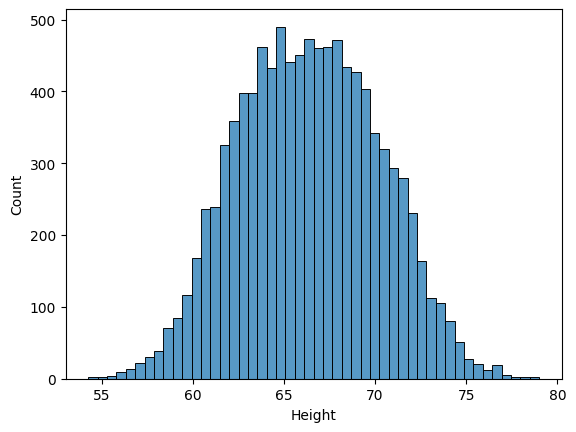

In [ ]:
sns.histplot(height)

### <font color='purple'>1. Quantile-Quantile plot </font>

One way to test for this is by utilizing the **QQ plot**, which stands for **Quantile-Quantile plot**.
- Think of it as a side-by-side comparison between your data and a hypothetical Gaussian (normal) distribution.


- To construct this plot, we place the quantiles (percentiles) of our data against those of a Gaussian distribution.
 - It is essentially comparing theoretical quantiles with quantiles we observe in the data.


Imagine we're looking at a scatter plot where **our data's z-scores** are compared to the **z-scores of a Gaussian distribution**.
 - **Why z-score?**: It give us a standardized way to compare different datasets.


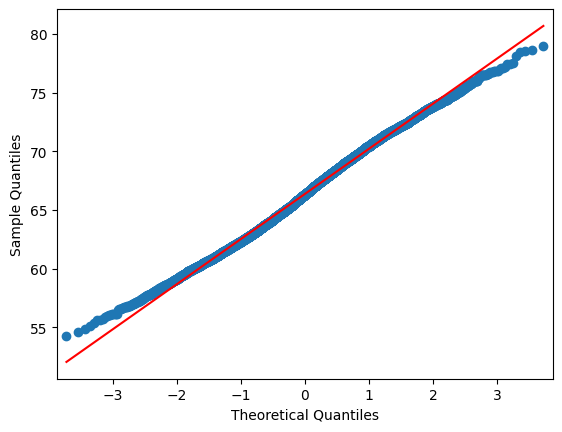

In [ ]:
qqplot(height, line="s")
plt.show()

<font color='purple'>How do we interpret a QQ plot?</font>

- The <font color='red'>red line</font> in a Q-Q plot is a comparison point, like a ruler.
 - It shows you what the data should look like if it perfectly follows a specific pattern, like a bell curve.
  - It is known as the **reference line**.
- The <font color='blue'>blue dots</font> represent the actual data points and show you how they match up to the expected pattern.
- If the red line is straight and the blue dots fall close to it, then your data fits the pattern well and follows a **Normal Distribution**.
- If the line is crooked or the dots are scattered, then your data doesn't quite fit and **does not** follow a **Normal Distribution.**

<br>

Consider this:

We know that when a variable follows Normal Distribution, then 99.7% of values lie between $\pm$3 standard deviations
- That's the theoretical quantiles
- This line of theoretical quantiles is compared with the actual quantile values

So, We just have to interpret whether the variable values lie on the theoretical line or deviate from them

We can safely say that height follows a Normal Distribution.

---

Let's consider a different data: `waiting time data`.

In [ ]:
!wget --no-check-certificate https://drive.google.com/uc?id=1v48RRtiivufSX4ewrMaxsADK73GnN2kI -O waiting_time.csv

--2024-01-18 09:41:33--  https://drive.google.com/uc?id=1v48RRtiivufSX4ewrMaxsADK73GnN2kI
Resolving drive.google.com (drive.google.com)... 64.233.181.139, 64.233.181.102, 64.233.181.101, ...
Connecting to drive.google.com (drive.google.com)|64.233.181.139|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1v48RRtiivufSX4ewrMaxsADK73GnN2kI [following]
--2024-01-18 09:41:33--  https://drive.usercontent.google.com/download?id=1v48RRtiivufSX4ewrMaxsADK73GnN2kI
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 142.250.148.132, 2607:f8b0:4001:c54::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|142.250.148.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1656272 (1.6M) [application/octet-stream]
Saving to: ‘waiting_time.csv’

waiting_time.csv    100%[===================>]   1.58M  --.-KB/s    in 0.01s   

2024-01-18 09:41:34 (137 MB

In [ ]:
path = '/content/waiting_time.csv'
df_wt = pd.read_csv(path)

In [ ]:
df_wt.head()

,time
0,184.003075
1,36.721521
2,29.970417
3,75.640285
4,61.489439


<Axes: xlabel='time', ylabel='Count'>

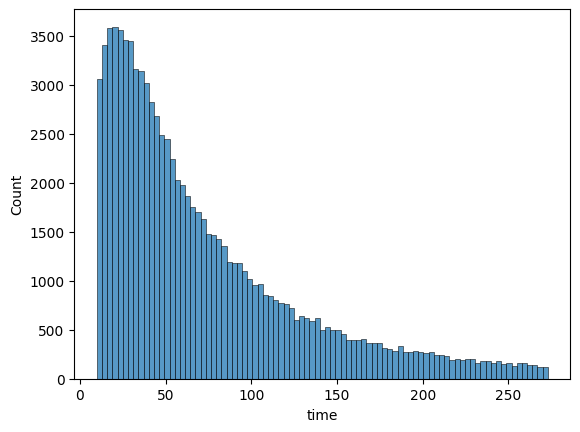

In [ ]:
sns.histplot(df_wt["time"])

This clearly does not look Gaussian. Let's observe it's QQ Plot

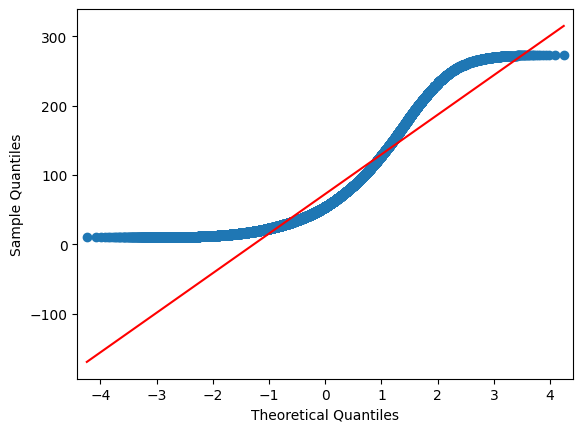

In [ ]:
qqplot(df_wt["time"], line="s")
plt.show()

From the above plot,

- We can see that points deviate from the straight line.
- This means that the feature `time` does NOT follow a Normal Distribution.

For QQPlot, we plot the z-score obtained against the sorted variables. Usually,
- The **z-scores** are in the **x-axis** (also called **theoretical quantiles** since we are using this as a base for comparison) and,
- The **variable quantiles** are in the **y-axis** (also called **ordered values**).

<br>


You may wonder,
> **Q. Can we not have z-score on both x and y axis?**

There's no strict rule that prevents you from plotting z-scores on both the x and y axes.

However, the convention of having z-scores on the x-axis and ordered values on the y-axis has some practical advantages for interpretation:

- **Placing the z-scores on the x-axis allows for a direct comparison to Standard Normal Distribution:**
 - If the points fall along the 45-degree line, it indicates that the observed data follows the same distribution as the standard distribution.

- **Ease of Interpretation:**
 - The 45-degree line represents a one-to-one correspondence between the theoretical and observed quantiles.
 - If the points deviate from this line, it's immediately noticeable.
 - Thereby providing a clear visual indicator of how well the observed data matches the theoretical distribution.

- **Consistency with Common Practices:**
 - The convention of placing theoretical quantiles on the x-axis is widely adopted in the statistical literature, making it easier for others to understand and interpret your plots.
 - While you can technically plot z-scores on both axes, doing so may not offer additional insights and might complicate interpretation without clear benefits.


---

### <font color='purple'> Shapiro-Wilk test</font>


Through the QQ Plot, we have a visual tool to check if the data follows Gaussian distribution or not.


Now, let's discuss the statistical test used to assess the normality of data – the **Shapiro-Wilk test**.

This test calculates a p-value that tells you whether your data could plausibly come from a normal distribution.

Here's how it works:
- If the p-value is high (greater than, say, 0.05),
 - It suggests that the data likely does come from a normal distribution.
- Conversely, if the p-value is low (less than 0.05),
 - It indicates that the data's distribution significantly differs from a normal distribution.

**Note:**
- This test may not work if data is too large

<br>

Let's implement this on our height data

In [ ]:
from scipy.stats import shapiro # Test Gaussian (50 to 200 samples)

In [ ]:
np.random.sample(42)
height_subset = height.sample(100)

In [ ]:
# H0: Data is Gaussian
# Ha: Data is not Gaussian
test_stat, p_value = shapiro(height_subset)
print(p_value)

0.3209303617477417


In [ ]:
if p_value < 0.05:
    print("Reject H0")
    print("Data is not Gaussian")
else:
    print("Fail to reject H0")
    print("Data is Gaussian")

Fail to reject H0
Data is Gaussian


Let's also verify if the QQ Plot of `waiting time data` gave us the correct inference.

In [ ]:
np.random.sample(42)
df_wt_subset = df_wt.sample(50)["time"]

In [ ]:
# H0: Data is Gaussian
# Ha: Data is not Gaussian
test_stat, p_value = shapiro(df_wt_subset)
print(p_value)

0.0014711181866005063


In [ ]:
if p_value < 0.05:
    print("Reject H0")
    print("Data is not Gaussian")
else:
    print("Fail to reject H0")
    print("Data is Gaussian")

Reject H0
Data is not Gaussian


## <font color='purple'> Levene Test</font>

Another assumption of ANOVA is that: `There should be equal variance in different groups/categories in our data`

Imagine you have multiple groups, and you want to see if the variability (spread) of data within each group is roughly the same.

> **How would we go about verifying that?**

We use a test known as the **Levene Test**.


The **Levene test** comes to the rescue by calculating a p-value. This p-value tells us whether the variances across the groups are statistically similar or if there are significant differences.

Here's how it pans out:
- If the p-value is high (greater than, say, 0.05),
 - It implies that the variances are relatively equal across the groups.

 - This aligns well with the assumption of equal variance.

- On the other hand, if the p-value is low (less than 0.05),
 - It suggests that the variances significantly differ across the groups.
 - In this case, the assumption of equal variance might not hold.

In [ ]:
from scipy.stats import levene # Test variance

<Axes: xlabel='Height', ylabel='Count'>

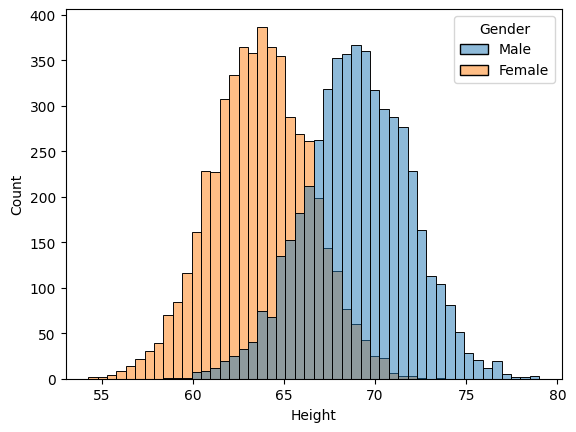

In [ ]:
sns.histplot(data=df_hw, x="Height", hue="Gender")

In [ ]:
height_men = df_hw[df_hw["Gender"]=="Male"]["Height"]
height_women = df_hw[df_hw["Gender"]=="Female"]["Height"]

In [ ]:
height_men.mean()

69.02634590621741

In [ ]:
height_women.mean()

63.70877360342507

In [ ]:
ttest_ind(height_men, height_women)

TtestResult(statistic=95.60271449148823, pvalue=0.0, df=9998.0)

In [ ]:
height_men.var()

8.198843252520467

In [ ]:
height_women.var()

7.2699474936701245

To establish whether this difference we see in variance is chance or significant, we have to use Levene test

In [ ]:
# H0: Variances are equal
# Ha: Variances are not equal
levene_stat, p_value = levene(height_men, height_women)
if p_value < 0.05:
    print("Variances are not equal")

Variances are not equal


---

---